# import Library

In [1]:
import sys
sys.path.append('../')
from my_library.library import *

# path ubu

In [ ]:
path_daw = '/home/hipro/デスクトップ/StockPriceData/Stock_index/DAW_10years.csv'
path_tpx = '/home/hipro/デスクトップ/StockPriceData/Stock_index/TOPIX_10years.csv'


# path mac

In [2]:
path_tpx = '/Users/rince/Desktop/StockPriceData/Stock_index/TOPIX_10years.csv'
path_225 = '/Users/rince/Desktop/StockPriceData/Stock_index/NK225_10years.csv'
path_daw = '/Users/rince/Desktop/StockPriceData/Stock_index/DAW_10years.csv'
path_bear = '/Users/rince/Desktop/StockPriceData/Stock_index/R225BEAR_10years.csv'
path_doll = '/Users/rince/Desktop/StockPriceData/Stock_index/doll_yen_bid.csv'
path_gold = '/Users/rince/Desktop/StockPriceData/Stock_index/gold_chusin.csv'
path_kawase = '/Users/rince/Desktop/StockPriceData/Stock_index/quote.csv'

# path win

In [ ]:
path_tpx = '/Users/Owner/Desktop/StockPriceData/Stock_index/TOPIX_10years.csv'
path_225 = '/Users/Owner/Desktop/StockPriceData/Stock_index/NK225_10years.csv'
path_daw = '/Users/Owner/Desktop/StockPriceData/Stock_index/DAW_10years.csv'
path_bear = '/Users/Owner/Desktop/StockPriceData/Stock_index/R225BEAR_10years.csv'

path_tpx_sim = '/Users/Owner/Desktop/StockPriceData/TOPIX/TOPIX_20211208.csv'
path_daw_sim = '/Users/Owner/Desktop/StockPriceData/DAW/DAW_20211208.csv'

# 相関係数求め方

In [ ]:
x_,y_,_,_ = lx.make_xgb_data(path_tpx,path_daw,0.8)


In [ ]:
year = 2021
x = df_con[df_con.index.year==year]['daw_close'].values
y = df_con[df_con.index.year==year]['close'].values
coef = np.corrcoef(x,y)

In [ ]:
strong_corr = []
x_corr = x_.corr()
for idx in x_corr.index:
    for col in x_corr.columns:
        if idx == col:
            continue
        else:
            corr = x_corr.loc[idx][col]
            if abs(corr)>=0.8:
                strong_corr.append([idx,col])

# 相関の強い特徴量をどうするか

差分取ってみる

差分とっても相関強いまま

In [ ]:
strong_corr

# 為替

In [ ]:
df_kawase = pd.read_csv(path_kawase, index_col=0,encoding='Shift_JIS')
column_name = df_kawase.iloc[0]
df_kawase = df_kawase.set_axis(df_kawase.iloc[1].values.tolist(),axis=1).iloc[2:]
df_kawase.dropna(how='all',axis=1,inplace=True)
df_kawase.replace('*****',np.nan,inplace=True)
df_kawase = df_kawase.astype('float64')
df_kawase['day'] = pd.to_datetime(df_kawase.index,format='%Y/%m/%d')
df_kawase.set_index('day',inplace=True)
# classes

In [ ]:
# pd.concat(df_kawase['USD'],df_con['close'])
df_corr = pd.DataFrame()
close = df_con['close']
USD = df_kawase['USD']

df_corr['close'] = (close-close.mean())/close.std()
df_corr['USD'] = (USD-USD.mean())/USD.std()
# df_corr['close'] =

# Learn XGB

In [ ]:
lx = LearnXGB()
lx.learn_xgb(path_tpx,path_daw)

# 市場平均だと, 年間収益は220

In [ ]:
for alpha in [0.5,0.6,0.7,0.8,0.9]:
    sl = XGBSimulation(lx.model,alpha=alpha)
    sl.simulate(path_tpx_sim,path_daw_sim,strategy='reverse',start_year=2021,start_month=1,end_month=12,is_observed=True)

In [ ]:
alpha=0.7
for month in range(1,12):
    sl = XGBSimulation(lx.model,alpha=alpha)
    sl.simulate(path_tpx_sim,path_daw_sim,strategy='reverse',start_year=2021,start_month=month,end_month=month)

# DAW simulte

Total profit :-81.0
Trade count  :18
Max profit   :52.0
Min profit   :-114.5
Mean profit  :-4.5
can't buy count 0
      score  Up precision  Down precision  Up recall  Down recall  up_num  \
0  0.484211      0.413793        0.515152   0.272727     0.666667    44.0   

   down_num  
0      51.0  



<Figure size 432x288 with 0 Axes>

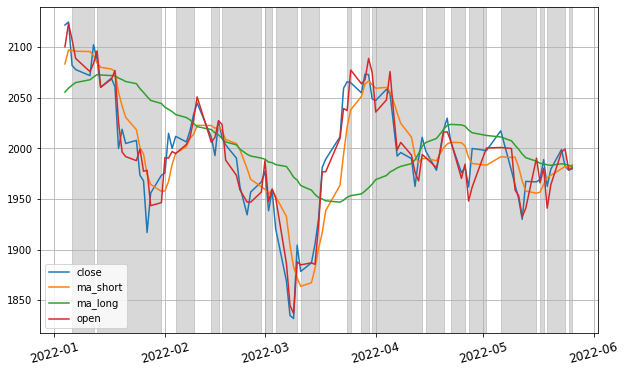

In [5]:
path_tpx_sim, path_daw_sim = return_latest_data_path('TOPIX')
ds = DawSimulation()
ds.simulate(path_tpx_sim,path_daw_sim,strategy='reverse',start_year=2022,end_year=2022,start_month=1,end_month=5)

# Random simulate

Total profit :-370.5
Trade count  :24
Max profit   :72.5
Min profit   :-85.5
Mean profit  :-15.4375
can't buy count 0
      score  Up precision  Down precision  Up recall  Down recall  up_num  \
0  0.452632      0.318182        0.493151   0.159091     0.705882    44.0   

   down_num  
0      51.0  



<Figure size 432x288 with 0 Axes>

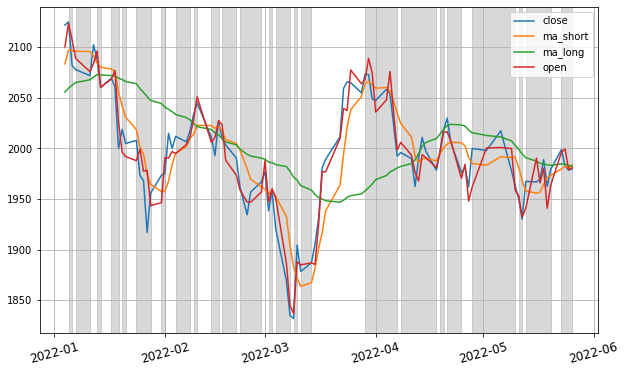

In [3]:
path_tpx_sim, path_daw_sim = return_latest_data_path('TOPIX')
rs = RandomSimulation()
rs.simulate(path_tpx_sim,path_daw_sim,start_year=2022,end_year=2022,start_month=1,end_month=5)

# predict tomorrow

In [ ]:
lx.predict_tomorrow(path_tpx_sim,path_daw_sim,alpha=0.5,strategy='reverse',start_year=2022,start_month=1,end_month=5,is_observed=True)

In [ ]:
path_tpx_sim, path_daw_sim = return_latest_data_path('TOPIX')
lx.predict_tomorrow(path_tpx_sim,path_daw_sim,alpha=0.6,strategy='normal',start_year=2022,start_month=1,end_month=5,is_observed=True)

# 累積収益率　比較

In [ ]:
pr_log_xn = {}
for alpha in [0.5,0.6,0.7,0.8,0.9]:
    print("*************************")
    print('alpha :',alpha)
    sl = XGBSimulation(lx.model,alpha=alpha)
    pr_tmp = sl.return_profit_rate(path_tpx_sim,path_daw_sim,wallet=2500,strategy='normal')
    pr_tmp = pr_tmp[pr_tmp.index.year==2021]
    pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
    pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])
    pr_log_xn[alpha] = pr_tmp

In [ ]:
plt.subplots(figsize=(10, 6))
plt.plot(pr_log_xn[0.5]['eval_reward'],label='normal_0.5')
plt.plot(pr_log_xn[0.6]['eval_reward'],label='normal_0.6')
plt.plot(pr_log_xn[0.7]['eval_reward'],label='normal_0.7')
plt.plot(pr_log_xn[0.8]['eval_reward'],label='normal_0.8')
plt.plot(pr_log_xn[0.9]['eval_reward'],label='normal_0.9')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pr_log_xr = {}
for alpha in [0.5,0.6,0.7,0.8,0.9]:
    print("*************************")
    print('alpha :',alpha)
    sl = XGBSimulation(lx.model,alpha=alpha)
    pr_tmp = sl.return_profit_rate(path_tpx_sim,path_daw_sim,wallet=2500,strategy='reverse')
    pr_tmp = pr_tmp[pr_tmp.index.year==2021]
    pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
    pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])
    pr_log_xr[alpha] = pr_tmp

In [ ]:
plt.subplots(figsize=(10, 6))
plt.plot(pr_log_xr[0.5]['eval_reward'],label='reverse_0.5')
plt.plot(pr_log_xr[0.6]['eval_reward'],label='reverse_0.6')
plt.plot(pr_log_xr[0.7]['eval_reward'],label='reverse_0.7')
plt.plot(pr_log_xr[0.8]['eval_reward'],label='reverse_0.8')
plt.plot(pr_log_xr[0.9]['eval_reward'],label='reverse_0.9')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.subplots(figsize=(10, 6))
plt.plot(pr_log_tpx['reward'].iloc[:-2],label='TOPIX')
plt.plot(pr_log_t[pr_log_t.index.year==2021]['eval_reward'].iloc[:-2],label='Technical')
plt.plot(pr_log_xr[0.9]['eval_reward'],label='reverse_0.9')
plt.plot(pr_log_xn[0.5]['eval_reward'],label='normal_0.5')
plt.legend()
plt.grid(True)
plt.show()